In [1]:
from sqlalchemy import create_engine
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
engine = create_engine('sqlite:///data/mta_data.db')

In [3]:
engine.table_names()

/var/folders/hy/v35lf41x0y53lz7vj63f3qvh0000gn/T/ipykernel_36072/4162273999.py:1: SADeprecationWarning: The Engine.table_names() method is deprecated and will be removed in a future release.  Please refer to Inspector.get_table_names(). (deprecated since: 1.4)
  engine.table_names()


['mta_data']

In [4]:
df = pd.read_sql('SELECT * FROM mta_data;', engine)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2639743 entries, 0 to 2639742
Data columns (total 11 columns):
 #   Column    Dtype 
---  ------    ----- 
 0   C/A       object
 1   UNIT      object
 2   SCP       object
 3   STATION   object
 4   LINENAME  object
 5   DIVISION  object
 6   DATE      object
 7   TIME      object
 8   DESC      object
 9   ENTRIES   int64 
 10  EXITS     int64 
dtypes: int64(2), object(9)
memory usage: 221.5+ MB


In [6]:
df.isna().sum()

C/A         0
UNIT        0
SCP         0
STATION     0
LINENAME    0
DIVISION    0
DATE        0
TIME        0
DESC        0
ENTRIES     0
EXITS       0
dtype: int64

In [7]:
df.head(5)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/23/2019,00:00:00,REGULAR,6989774,2370411
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/23/2019,04:00:00,REGULAR,6989795,2370413
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/23/2019,08:00:00,REGULAR,6989813,2370436
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/23/2019,12:00:00,REGULAR,6989924,2370512
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/23/2019,16:00:00,REGULAR,6990200,2370573


In [8]:
df['DATE'].value_counts().sort_index()

01/01/2019    28742
01/02/2019    28691
01/03/2019    28584
01/04/2019    29388
01/05/2019    28619
              ...  
03/28/2019    28911
03/29/2019    30220
12/29/2018    28591
12/30/2018    28648
12/31/2018    28959
Name: DATE, Length: 91, dtype: int64

In [9]:
df['DATE_TIME'] = pd.to_datetime(df['DATE'] + " " + df['TIME'], format='%m/%d/%Y %H:%M:%S')

In [10]:
df['TURNSTILE'] = df['C/A'] + '-' + df['UNIT'] + '-' + df['SCP']

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2639743 entries, 0 to 2639742
Data columns (total 13 columns):
 #   Column     Dtype         
---  ------     -----         
 0   C/A        object        
 1   UNIT       object        
 2   SCP        object        
 3   STATION    object        
 4   LINENAME   object        
 5   DIVISION   object        
 6   DATE       object        
 7   TIME       object        
 8   DESC       object        
 9   ENTRIES    int64         
 10  EXITS      int64         
 11  DATE_TIME  datetime64[ns]
 12  TURNSTILE  object        
dtypes: datetime64[ns](1), int64(2), object(10)
memory usage: 261.8+ MB


In [12]:
df.head(5)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME,TURNSTILE
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/23/2019,00:00:00,REGULAR,6989774,2370411,2019-03-23 00:00:00,A002-R051-02-00-00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/23/2019,04:00:00,REGULAR,6989795,2370413,2019-03-23 04:00:00,A002-R051-02-00-00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/23/2019,08:00:00,REGULAR,6989813,2370436,2019-03-23 08:00:00,A002-R051-02-00-00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/23/2019,12:00:00,REGULAR,6989924,2370512,2019-03-23 12:00:00,A002-R051-02-00-00
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/23/2019,16:00:00,REGULAR,6990200,2370573,2019-03-23 16:00:00,A002-R051-02-00-00


In [13]:
(df
 .groupby(['STATION', 'TURNSTILE', 'DATE_TIME'])
 ['ENTRIES'].count()
 .reset_index()
 .sort_values('ENTRIES', ascending=False)).head(10)

,STATION,TURNSTILE,DATE_TIME,ENTRIES
1087567,B'WAY-LAFAYETTE,N519-R461-00-03-01,2019-03-24 21:00:00,2
285400,207 ST,R188-R037-00-06-02,2019-02-28 07:00:00,2
125780,14 ST-UNION SQ,A034-R170-03-03-00,2019-03-12 17:00:00,2
1087566,B'WAY-LAFAYETTE,N519-R461-00-03-01,2019-03-24 17:00:00,2
705638,57 ST-7 AV,A011-R080-01-00-01,2018-12-30 15:00:00,2
1087565,B'WAY-LAFAYETTE,N519-R461-00-03-01,2019-03-24 13:00:00,2
1087564,B'WAY-LAFAYETTE,N519-R461-00-03-01,2019-03-24 09:00:00,2
1087563,B'WAY-LAFAYETTE,N519-R461-00-03-01,2019-03-24 05:00:00,2
1087562,B'WAY-LAFAYETTE,N519-R461-00-03-01,2019-03-24 01:00:00,2
1087561,B'WAY-LAFAYETTE,N519-R461-00-03-01,2019-03-23 21:00:00,2


In [14]:
duplicates = (df
                .groupby(['STATION', 'TURNSTILE', 'DATE_TIME'])
                ['ENTRIES'].count()
                .reset_index()
                .sort_values('ENTRIES', ascending=False))

duplicates[duplicates['ENTRIES'] > 1].count()

STATION      84
TURNSTILE    84
DATE_TIME    84
ENTRIES      84
dtype: int64

In [15]:
df.drop_duplicates(subset=['STATION', 'TURNSTILE', 'DATE_TIME'], inplace=True)

In [16]:
(df
 .groupby(['STATION', 'TURNSTILE', 'DATE_TIME'])
 ['ENTRIES'].count()
 .reset_index()
 .sort_values('ENTRIES', ascending=False)
 .head(5))

,STATION,TURNSTILE,DATE_TIME,ENTRIES
0,1 AV,H007-R248-00-00-00,2018-12-29 03:00:00,1
1759746,GRD CNTRL-42 ST,R240-R047-00-03-04,2019-03-12 05:00:00,1
1759768,GRD CNTRL-42 ST,R240-R047-00-03-04,2019-03-15 21:00:00,1
1759769,GRD CNTRL-42 ST,R240-R047-00-03-04,2019-03-16 01:00:00,1
1759770,GRD CNTRL-42 ST,R240-R047-00-03-04,2019-03-16 05:00:00,1


In [17]:
df.sort_values(['STATION', 'TURNSTILE', 'DATE_TIME'], inplace=True)

In [18]:
df.head(5)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME,TURNSTILE
2468630,H007,R248,00-00-00,1 AV,L,BMT,12/29/2018,03:00:00,REGULAR,14269844,15995700,2018-12-29 03:00:00,H007-R248-00-00-00
2468631,H007,R248,00-00-00,1 AV,L,BMT,12/29/2018,07:00:00,REGULAR,14269870,15995840,2018-12-29 07:00:00,H007-R248-00-00-00
2468632,H007,R248,00-00-00,1 AV,L,BMT,12/29/2018,11:00:00,REGULAR,14270149,15996386,2018-12-29 11:00:00,H007-R248-00-00-00
2468633,H007,R248,00-00-00,1 AV,L,BMT,12/29/2018,15:00:00,REGULAR,14270714,15997278,2018-12-29 15:00:00,H007-R248-00-00-00
2468634,H007,R248,00-00-00,1 AV,L,BMT,12/29/2018,19:00:00,REGULAR,14271329,15998167,2018-12-29 19:00:00,H007-R248-00-00-00


In [19]:
df_daily = (df
            .groupby(['STATION', 'TURNSTILE', 'DATE'], as_index=False)['ENTRIES']
            .last())

In [20]:
df_daily.head(5)

,STATION,TURNSTILE,DATE,ENTRIES
0,1 AV,H007-R248-00-00-00,01/01/2019,14277982
1,1 AV,H007-R248-00-00-00,01/02/2019,14281488
2,1 AV,H007-R248-00-00-00,01/03/2019,14285396
3,1 AV,H007-R248-00-00-00,01/04/2019,14289241
4,1 AV,H007-R248-00-00-00,01/05/2019,14291511


In [21]:
df_daily[['PREV_DATE', 'PREV_ENTRIES']] = (df_daily
                                           .groupby(['STATION', 'TURNSTILE'])['DATE', 'ENTRIES']
                                           .apply(lambda grp: grp.shift(1)))

/var/folders/hy/v35lf41x0y53lz7vj63f3qvh0000gn/T/ipykernel_36072/3229782862.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_daily[['PREV_DATE', 'PREV_ENTRIES']] = (df_daily


In [22]:
df_daily.head(5)

,STATION,TURNSTILE,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES
0,1 AV,H007-R248-00-00-00,01/01/2019,14277982,NaN,NaN
1,1 AV,H007-R248-00-00-00,01/02/2019,14281488,01/01/2019,14277982.0
2,1 AV,H007-R248-00-00-00,01/03/2019,14285396,01/02/2019,14281488.0
3,1 AV,H007-R248-00-00-00,01/04/2019,14289241,01/03/2019,14285396.0
4,1 AV,H007-R248-00-00-00,01/05/2019,14291511,01/04/2019,14289241.0


In [23]:
df_daily.tail(5)

,STATION,TURNSTILE,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES
437931,ZEREGA AV,R419-R326-00-05-01,03/28/2019,39,03/27/2019,39.0
437932,ZEREGA AV,R419-R326-00-05-01,03/29/2019,39,03/28/2019,39.0
437933,ZEREGA AV,R419-R326-00-05-01,12/29/2018,39,03/29/2019,39.0
437934,ZEREGA AV,R419-R326-00-05-01,12/30/2018,39,12/29/2018,39.0
437935,ZEREGA AV,R419-R326-00-05-01,12/31/2018,39,12/30/2018,39.0


In [24]:
df_daily.dropna(subset=['PREV_DATE'], axis=0, inplace=True)

In [25]:
df_daily[df_daily['ENTRIES'] < df_daily['PREV_ENTRIES']].head()

,STATION,TURNSTILE,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES
88,1 AV,H007-R248-00-00-00,12/29/2018,14271773,03/29/2019,14552831.0
179,1 AV,H007-R248-00-00-01,12/29/2018,59751362,03/29/2019,60063657.0
270,1 AV,H007-R248-00-03-00,12/29/2018,370535324,03/29/2019,370615725.0
361,1 AV,H007-R248-00-03-01,12/29/2018,2350876,03/29/2019,2414150.0
452,1 AV,H007-R248-00-03-02,12/29/2018,6235388,03/29/2019,6328047.0


In [26]:
(df_daily[df_daily['ENTRIES'] < df_daily['PREV_ENTRIES']]
 .groupby(['STATION', 'TURNSTILE'])
 .size())

STATION    TURNSTILE         
1 AV       H007-R248-00-00-00    1
           H007-R248-00-00-01    1
           H007-R248-00-03-00    1
           H007-R248-00-03-01    1
           H007-R248-00-03-02    1
                                ..
ZEREGA AV  R419-R326-00-00-00    2
           R419-R326-00-00-01    1
           R419-R326-00-03-00    1
           R419-R326-00-03-01    1
           R419-R326-00-05-00    1
Length: 4570, dtype: int64

In [27]:
def get_daily_counts(row, max_counter):
    counter = row['ENTRIES'] - row['PREV_ENTRIES']
    if counter < 0:
        counter = -counter
    if counter > max_counter:
        counter = min(row['ENTRIES'], row['PREV_ENTRIES'])
    if counter > max_counter:
        return 0
    return counter

df_daily['DAILY_ENTRIES'] = df_daily.apply(get_daily_counts, axis=1, max_counter=1000000)

In [28]:
df_daily.head(5)

,STATION,TURNSTILE,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES,DAILY_ENTRIES
1,1 AV,H007-R248-00-00-00,01/02/2019,14281488,01/01/2019,14277982.0,3506.0
2,1 AV,H007-R248-00-00-00,01/03/2019,14285396,01/02/2019,14281488.0,3908.0
3,1 AV,H007-R248-00-00-00,01/04/2019,14289241,01/03/2019,14285396.0,3845.0
4,1 AV,H007-R248-00-00-00,01/05/2019,14291511,01/04/2019,14289241.0,2270.0
5,1 AV,H007-R248-00-00-00,01/06/2019,14293461,01/05/2019,14291511.0,1950.0


In [29]:
daily_sum = (df_daily
             .groupby(['STATION', 'TURNSTILE', 'DATE'])['DAILY_ENTRIES']
             .sum())

daily_sum

STATION    TURNSTILE           DATE      
1 AV       H007-R248-00-00-00  01/02/2019    3506.0
                               01/03/2019    3908.0
                               01/04/2019    3845.0
                               01/05/2019    2270.0
                               01/06/2019    1950.0
                                              ...  
ZEREGA AV  R419-R326-00-05-01  03/28/2019       0.0
                               03/29/2019       0.0
                               12/29/2018       0.0
                               12/30/2018       0.0
                               12/31/2018       0.0
Name: DAILY_ENTRIES, Length: 433030, dtype: float64

In [30]:
df_daily['DAILY_ENTRIES'] = (df_daily
                           .groupby(['STATION', 'TURNSTILE', 'DATE'])['DAILY_ENTRIES']
                           .transform('sum'))

In [31]:
df_daily.head(5)

,STATION,TURNSTILE,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES,DAILY_ENTRIES
1,1 AV,H007-R248-00-00-00,01/02/2019,14281488,01/01/2019,14277982.0,3506.0
2,1 AV,H007-R248-00-00-00,01/03/2019,14285396,01/02/2019,14281488.0,3908.0
3,1 AV,H007-R248-00-00-00,01/04/2019,14289241,01/03/2019,14285396.0,3845.0
4,1 AV,H007-R248-00-00-00,01/05/2019,14291511,01/04/2019,14289241.0,2270.0
5,1 AV,H007-R248-00-00-00,01/06/2019,14293461,01/05/2019,14291511.0,1950.0


In [32]:
df_daily.head()

,STATION,TURNSTILE,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES,DAILY_ENTRIES
1,1 AV,H007-R248-00-00-00,01/02/2019,14281488,01/01/2019,14277982.0,3506.0
2,1 AV,H007-R248-00-00-00,01/03/2019,14285396,01/02/2019,14281488.0,3908.0
3,1 AV,H007-R248-00-00-00,01/04/2019,14289241,01/03/2019,14285396.0,3845.0
4,1 AV,H007-R248-00-00-00,01/05/2019,14291511,01/04/2019,14289241.0,2270.0
5,1 AV,H007-R248-00-00-00,01/06/2019,14293461,01/05/2019,14291511.0,1950.0


In [33]:
station_traffic = (df_daily
                .groupby(['STATION'])['DAILY_ENTRIES']
                .sum()
                .reset_index())

station_traffic.head(5)

,STATION,DAILY_ENTRIES
0,1 AV,2634038.0
1,103 ST,4511321.0
2,103 ST-CORONA,3061425.0
3,104 ST,663583.0
4,110 ST,1651063.0


In [34]:
station_traffic.sort_values(by='DAILY_ENTRIES', ascending=False, inplace=True)
station_traffic.head(5)

,STATION,DAILY_ENTRIES
61,34 ST-PENN STA,31151940.0
233,GRD CNTRL-42 ST,22015326.0
59,34 ST-HERALD SQ,18949134.0
46,23 ST,18222299.0
68,42 ST-PORT AUTH,15931334.0


In [35]:
station_traffic.reset_index(drop=True, inplace=True)
station_traffic.head(5)

,STATION,DAILY_ENTRIES
0,34 ST-PENN STA,31151940.0
1,GRD CNTRL-42 ST,22015326.0
2,34 ST-HERALD SQ,18949134.0
3,23 ST,18222299.0
4,42 ST-PORT AUTH,15931334.0


In [36]:
top_10 = station_traffic.iloc[0:10]
top_10

,STATION,DAILY_ENTRIES
0,34 ST-PENN STA,31151940.0
1,GRD CNTRL-42 ST,22015326.0
2,34 ST-HERALD SQ,18949134.0
3,23 ST,18222299.0
4,42 ST-PORT AUTH,15931334.0
5,14 ST-UNION SQ,15906834.0
6,TIMES SQ-42 ST,14975674.0
7,CANAL ST,14229558.0
8,86 ST,13696063.0
9,FULTON ST,13507011.0


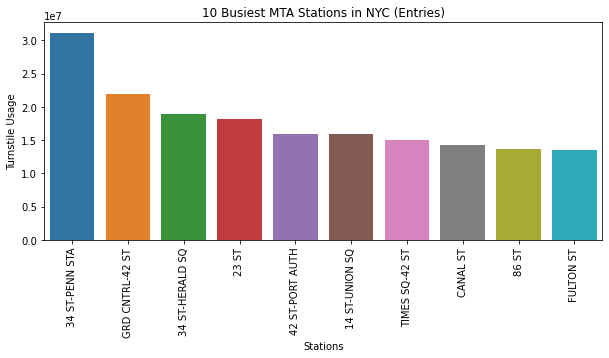

In [37]:
#10 busiest stations (daily entries)
plt.figure(figsize=(10,4))
sns.barplot(x=top_10['STATION'],y=top_10['DAILY_ENTRIES'])
plt.title('10 Busiest MTA Stations in NYC (Entries)')
plt.xlabel('Stations')
plt.ylabel('Turnstile Usage')
plt.xticks(rotation=90);